# MA 506 Probability and Statistical Inference
# Lecture 23: Logistic Regression 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 **We had to solve the optimization problem**:
$$
\min_\beta LL = 
\boxed{
\min_{\beta} -\sum_i \Big [y_i log(h(x_i)) + (1 - y_i)log(1 - h(x_i)) \Big]}, \text{  where  }h(x) = \frac{1}{1+e^{-X\beta}} \tag{1}
$$

## Solving optimization problem for Logistic Regression

We use a gradient based approach called: **Gradient Descent**

Like before, assuming $g(x) = 1/(1 + e^{-x})$, differentiating g(x) with respect to x we obtain:

$$
g^{'}(x) = \frac{-1}{(1 + e^{-x})^2} e^{-x} (-1) = \frac{e^{-x}}{(1 + e^{-x})^2} = \frac{1}{1+e^{-x}}\cdot \frac{e^{-x}}{1 + e^{-x}} = g(x)(1 - g(x))
$$

The main idea here is to use the following gradient step iteratively to converge to a good solution of $\beta$:
$$
\beta^{j+1} \leftarrow \beta^j - \alpha \nabla LL \tag{2}
$$

**As an example**, assuming we are fitting the model $h(x) = 1/(1 + e^{-(\beta_0 + \beta_1x)})$. Hence, the polynomial in the power of e is a staight line with 2 parameters: $\beta = [\beta_0, \beta_1]$. For this case, the vector form of (2) will be

$$
\begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix}^{j+1} \leftarrow \begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix}^{j} - \alpha \begin{bmatrix} \partial LL/\partial \beta_0 \\ \partial LL/\partial \beta_1 \end{bmatrix}^{j}
$$

where the left hand side is the estimate of $\beta$ at iteration: $j+1$, by using the previous estimate of $\beta$ at iteration: $j$, offset by the gradient information.

### Computing: $\nabla LL$ for the gradient based update in (2):

\begin{align}
\nabla LL &= - \nabla \sum_i \Bigg[y_i log (h(x_i)) + (1 - y_i) log(1 - h(x_i)) \Bigg]\\
&= -\sum_i \Bigg[y_i \nabla log (h(x_i)) + (1-y_i) \nabla log(1 - h(x_i)) \Big] \tag{3}
\end{align}

Computing the required terms

\begin{align}
\nabla log(h(x)) &= \nabla log(g(X \beta)) = \frac{1}{g(X \beta)} g(X \beta) (1 - g(X \beta))  X = (1 - g(X \beta))X = (1 - h(x))X
\end{align}

\begin{align}
\nabla log(1 - h(x)) &= \nabla log(1 - g(X \beta)) = \frac{1}{1 - g(X \beta)} -g(X \beta) (1 - g(X \beta))  X = -g(X \beta)X = - h(x)X
\end{align}

Putting it back in (3)

\begin{align}
\nabla LL &= -\sum_i \Bigg[y_i \nabla log (h(x_i)) + (1-y_i) \nabla log(1 - h(x_i)) \Big] \\
&= -\sum_i \Bigg[y_i (1 - h(x_i))X_i - (1 - y_i)h(x_i)X_i \Bigg]\\
&= -\sum_i \Bigg[y_iX_i - y_i h(x_i)X_i - h(x_i)X_i + y_i h(x_i)X_i \Bigg]\\
&= -\sum_i \Bigg[y_iX_i - h(x_i)X_i \Bigg]\\
&= -\sum_i \Bigg[(y_i - \hat{y}_i)X_i \Bigg]\\
&= -X^T(Y - \hat{Y})
\end{align}

Hence the final gradient step is:
$$
\boxed{
\beta^{j+1} \leftarrow \beta^j + \alpha X^T(Y - \hat{Y})
}
$$

## Data

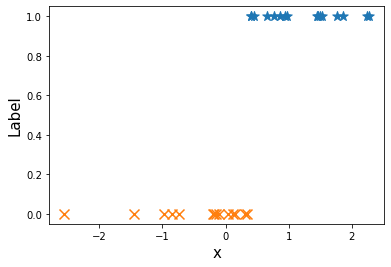

In [10]:
np.random.seed(0)
l = 30
xs = np.random.randn(l).reshape(l,1)
ys = np.ones(l)
ys[xs[:,0] < 0.4] = 0
### Plotting
plt.scatter(xs[ys == 1],ys[ys == 1],marker = '*',s = 100)
plt.scatter(xs[ys == 0],ys[ys == 0],marker = 'x',s = 100)
plt.xlabel('x',size = 15)
plt.ylabel('Label',size = 15)
plt.show()

In [ ]:
Logistic Regression code 

In [13]:
def h(X,beta):
    ## returns the value of the sigmoid function
    ypred = 1/(1 + np.exp(-1*X.dot(beta)))
    return ypred

def model_cost(X,y,beta):
    ## computes the value of the model fitting cost
    cost = 0
    for j in range(X.shape[0]):
        term1 = y[j]*np.log(h(X[j,:],beta))[0]
        term2 = (1 - y[j])*np.log(1 - h(X[j,:],beta))[0]
        cost = cost - (term1+term2)
    return cost

def gradient_descent(X,y,beta0,alpha,iteration):
    ## Implemented iteration for the gradient descent algorithm
    ypred = h(X,beta0)
    beta = [beta0]
    cost = [model_cost(X,y,beta0)]
    for j in range(iteration):
        grad_l = -1*X.T.dot(y.reshape(-1,1) - ypred)
        beta_new = beta[-1] - alpha * grad_l
        ypred = h(X,beta_new)
        beta.append(beta_new)
        print('Cost at iteration '+str(j)+' is: ',model_cost(X,y,beta_new))
        cost.append(model_cost(X,y,beta_new))
    return [beta_new,cost]

In [17]:
beta = np.ones([2,1])
alpha = 0.01
iteration = 1000
Xs = np.concatenate((np.ones([len(xs),1]),xs),axis = 1)
beta_new, cost = gradient_descent(Xs,ys,beta,alpha,iteration)

Cost at iteration 0 is:  16.351199952598375
Cost at iteration 1 is:  15.781802910927286
Cost at iteration 2 is:  15.258244992371655
Cost at iteration 3 is:  14.776405762764814
Cost at iteration 4 is:  14.332497359223387
Cost at iteration 5 is:  13.923051756767292
Cost at iteration 6 is:  13.544904107885433
Cost at iteration 7 is:  13.195173937965585
Cost at iteration 8 is:  12.871245367938915
Cost at iteration 9 is:  12.570747141571935
Cost at iteration 10 is:  12.291532977163167
Cost at iteration 11 is:  12.03166259044695
Cost at iteration 12 is:  11.789383615823969
Cost at iteration 13 is:  11.56311456777989
Cost at iteration 14 is:  11.35142892224533
Cost at iteration 15 is:  11.1530403518358
Cost at iteration 16 is:  10.966789115068666
Cost at iteration 17 is:  10.791629574915099
Cost at iteration 18 is:  10.626618804381591
Cost at iteration 19 is:  10.470906224709877
Cost at iteration 20 is:  10.323724214047292
Cost at iteration 21 is:  10.184379620112328
Cost at iteration 22 is: 

Cost at iteration 204 is:  5.215426183146464
Cost at iteration 205 is:  5.207952291896097
Cost at iteration 206 is:  5.200526807654921
Cost at iteration 207 is:  5.193149190500515
Cost at iteration 208 is:  5.185818909059641
Cost at iteration 209 is:  5.1785354403331745
Cost at iteration 210 is:  5.171298269525409
Cost at iteration 211 is:  5.164106889877654
Cost at iteration 212 is:  5.156960802505908
Cost at iteration 213 is:  5.149859516242604
Cost at iteration 214 is:  5.1428025474822014
Cost at iteration 215 is:  5.135789420030577
Cost at iteration 216 is:  5.128819664958098
Cost at iteration 217 is:  5.121892820456228
Cost at iteration 218 is:  5.115008431697636
Cost at iteration 219 is:  5.108166050699643
Cost at iteration 220 is:  5.101365236190939
Cost at iteration 221 is:  5.094605553481499
Cost at iteration 222 is:  5.087886574335559
Cost at iteration 223 is:  5.0812078768476
Cost at iteration 224 is:  5.074569045321272
Cost at iteration 225 is:  5.06796967015112
Cost at ite

Cost at iteration 399 is:  4.297799945468686
Cost at iteration 400 is:  4.29476085401409
Cost at iteration 401 is:  4.291732038729955
Cost at iteration 402 is:  4.288713439894839
Cost at iteration 403 is:  4.285704998278249
Cost at iteration 404 is:  4.282706655135403
Cost at iteration 405 is:  4.279718352202085
Cost at iteration 406 is:  4.2767400316895365
Cost at iteration 407 is:  4.273771636279447
Cost at iteration 408 is:  4.270813109118976
Cost at iteration 409 is:  4.26786439381587
Cost at iteration 410 is:  4.264925434433623
Cost at iteration 411 is:  4.261996175486704
Cost at iteration 412 is:  4.259076561935858
Cost at iteration 413 is:  4.256166539183442
Cost at iteration 414 is:  4.253266053068844
Cost at iteration 415 is:  4.250375049863953
Cost at iteration 416 is:  4.247493476268678
Cost at iteration 417 is:  4.24462127940655
Cost at iteration 418 is:  4.241758406820329
Cost at iteration 419 is:  4.238904806467735
Cost at iteration 420 is:  4.236060426717174
Cost at iter

Cost at iteration 597 is:  3.8419974148431812
Cost at iteration 598 is:  3.840238864013632
Cost at iteration 599 is:  3.8384843127396264
Cost at iteration 600 is:  3.8367337452834573
Cost at iteration 601 is:  3.8349871459947167
Cost at iteration 602 is:  3.8332444993096737
Cost at iteration 603 is:  3.8315057897506417
Cost at iteration 604 is:  3.829771001925379
Cost at iteration 605 is:  3.828040120526467
Cost at iteration 606 is:  3.82631313033072
Cost at iteration 607 is:  3.824590016198575
Cost at iteration 608 is:  3.8228707630734946
Cost at iteration 609 is:  3.8211553559814058
Cost at iteration 610 is:  3.819443780030075
Cost at iteration 611 is:  3.8177360204085717
Cost at iteration 612 is:  3.816032062386665
Cost at iteration 613 is:  3.8143318913142714
Cost at iteration 614 is:  3.812635492620886
Cost at iteration 615 is:  3.8109428518150246
Cost at iteration 616 is:  3.809253954483672
Cost at iteration 617 is:  3.8075687862917382
Cost at iteration 618 is:  3.805887332981497

Cost at iteration 810 is:  3.538343110170897
Cost at iteration 811 is:  3.5371816839947354
Cost at iteration 812 is:  3.5360222010067632
Cost at iteration 813 is:  3.534864655520231
Cost at iteration 814 is:  3.533709041871845
Cost at iteration 815 is:  3.532555354421635
Cost at iteration 816 is:  3.5314035875528336
Cost at iteration 817 is:  3.530253735671758
Cost at iteration 818 is:  3.529105793207676
Cost at iteration 819 is:  3.5279597546126964
Cost at iteration 820 is:  3.526815614361641
Cost at iteration 821 is:  3.5256733669519273
Cost at iteration 822 is:  3.524533006903454
Cost at iteration 823 is:  3.52339452875847
Cost at iteration 824 is:  3.52225792708147
Cost at iteration 825 is:  3.5211231964590697
Cost at iteration 826 is:  3.5199903314998977
Cost at iteration 827 is:  3.5188593268344652
Cost at iteration 828 is:  3.5177301771150695
Cost at iteration 829 is:  3.516602877015668
Cost at iteration 830 is:  3.5154774212317705
Cost at iteration 831 is:  3.51435380448032
Cos

In [18]:
beta_new

array([[-2.62491271],
       [ 7.48557568]])

In [27]:
xpred = np.linspace(-3,3,100).reshape(-1,1)
Xpred = np.concatenate((np.ones([len(xpred),1]),xpred),axis = 1)
pred = h(Xpred,beta_new)


In [29]:
np.random.seed(0)
l = 30
xs = np.random.randn(l).reshape(l,1)
ys = np.ones(l)
ys[xs[:,0] < 0.4] = 0
### Plotting
plt.scatter(xs[ys == 1],ys[ys == 1],marker = '*',s = 100)
plt.plot(xpred,pred,label ='Prediction')
plt.scatter(xs[ys == 0],ys[ys == 0],marker = 'x',s = 100)
plt.xlabel('x',size = 15)
plt.ylabel('Label',size = 15)
plt.show()